# Reconaissance des régions actives et structures
Reconnaissance automatique des régions actives et structures sur les images des lunettes

Ressources: https://www.computing-conf.org/wp-content/uploads/2022/11/1_AC2022_F_044.pdf

In [1]:
from module import readFitsBz2

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

c:\Users\lherrington\anaconda3\envs\climso\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 'data/L2/imoa_03933_l2_20240228_12402419_emi1.fts.bz2'
# 'data/L2/imoa_03933_l2_20240228_14452489_emi1.fts.bz2'

hdu = readFitsBz2('data/L2/imoa_03933_l2_20240228_12402419_emi1.fts.bz2')

Detecteur de canny pour obtenir les contours.

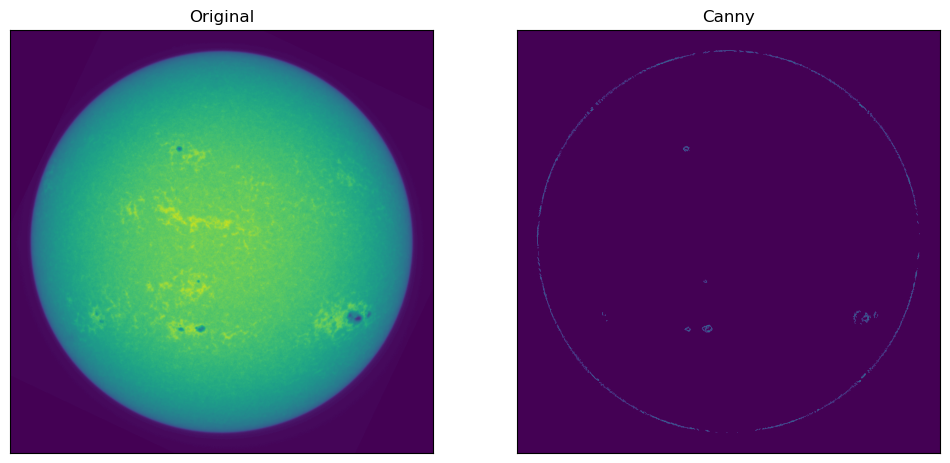

In [12]:
img = np.flip(cv.convertScaleAbs(hdu.data, alpha=(255.0/65535.0)).astype(np.uint8), axis=0)

blur = cv.blur(img,(10,10))

img_canny = cv.Canny(blur, 8, 14)

plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(img_canny)
plt.title('Canny'), plt.xticks([]), plt.yticks([]);

Fermeture pour confondre les elements proches.

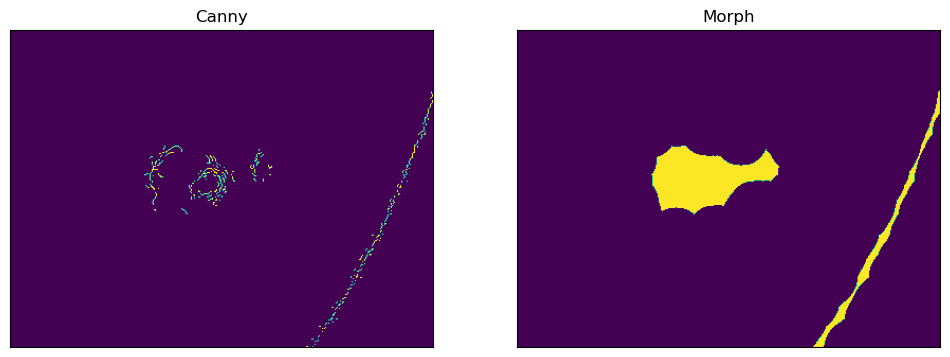

In [13]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(49,49))
img_morph = cv.morphologyEx(img_canny, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img_canny[1250:1550,1500:1900])
plt.title('Canny'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(img_morph[1250:1550,1500:1900])
plt.title('Morph'), plt.xticks([]), plt.yticks([]);

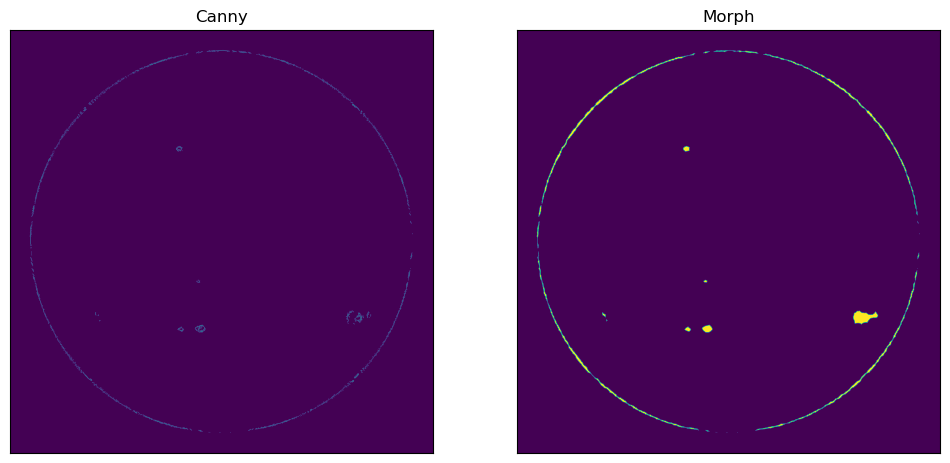

In [14]:
plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img_canny)
plt.title('Canny'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(img_morph)
plt.title('Morph'), plt.xticks([]), plt.yticks([]);

On labelise chaque element et on supprime les elements correspondant au contour du disque.

In [15]:
n_labels, labels, stats, centroids = cv.connectedComponentsWithStats(img_morph, connectivity=8)
cv.circle(labels, (1024,1024), 924,color=(0,0,0), thickness = 15);

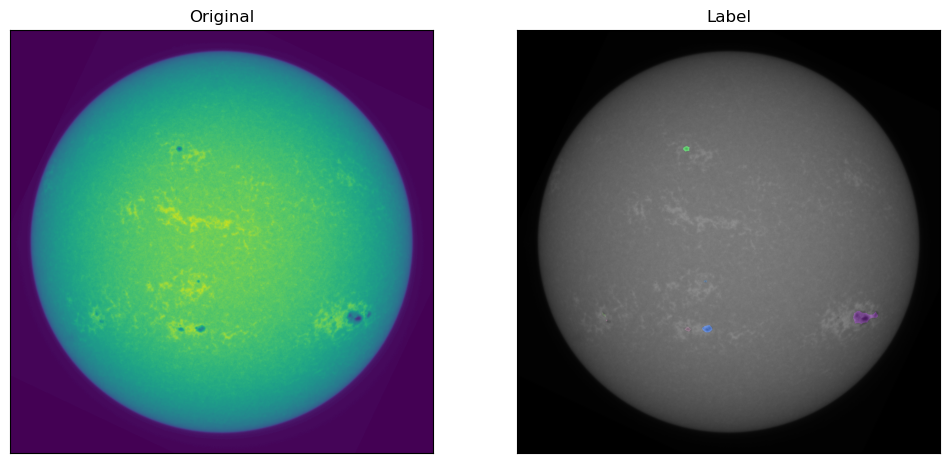

In [16]:
colors = np.random.randint(0, 255, size=(n_labels , 3), dtype=np.uint8)
colors[0] = [0, 0, 0]
false_colors = colors[labels]

img_label = cv.addWeighted(cv.cvtColor(img, cv.COLOR_GRAY2RGB),2,false_colors,0.5,0)

plt.figure(figsize=(12,12))
plt.subplot(121), plt.imshow(img);
plt.title('Original'), plt.xticks([]), plt.yticks([]);
plt.subplot(122), plt.imshow(img_label);
plt.title('Label'), plt.xticks([]), plt.yticks([]);

Rectangle entourant chaque element.

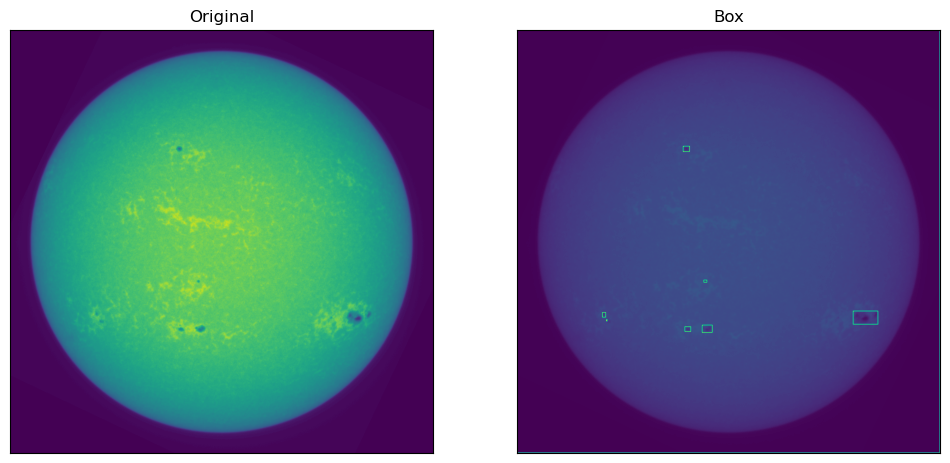

In [17]:
img_boxes = np.empty(img.shape,dtype=np.uint8)
for idx in range(n_labels):
    rect = cv.boundingRect((labels==idx).astype(np.uint8))
    cv.rectangle(img_boxes,rect,(255,0,0),2)

output = cv.addWeighted(img,1,img_boxes,1,0)

plt.figure(figsize=(12,12))
plt.subplot(121), plt.imshow(img);
plt.title('Original'), plt.xticks([]), plt.yticks([]);
plt.subplot(122), plt.imshow(output);
plt.title('Box'), plt.xticks([]), plt.yticks([]);

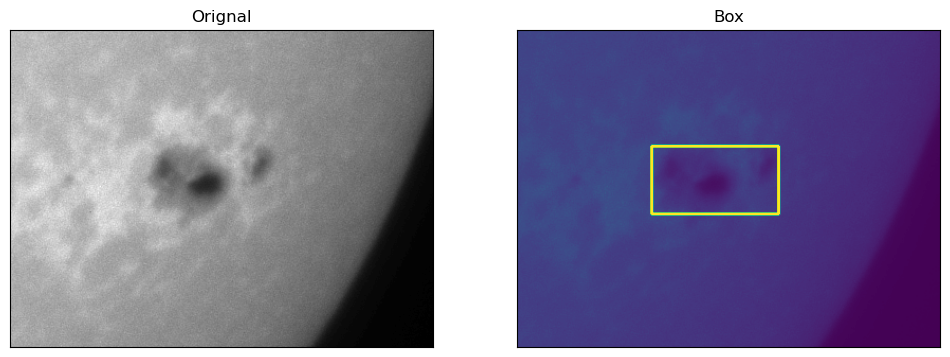

In [18]:
plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img[1250:1550,1500:1900],cmap='gray')
plt.title('Orignal'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(output[1250:1550,1500:1900])
plt.title('Box'), plt.xticks([]), plt.yticks([]);

Later:
- Tracking using distance
- Template/Block matching to follow when gap between obs
- SIFT?

- speed (accounting for rotation)